In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Supervised Contrastive (SimCLR) loss vs Cross Entropy (Normal): initial experiment

In [3]:
clf_val  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_loss.csv')
norm_val = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_loss.csv')
clf_acc  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_accuracy.csv')
norm_acc = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_accuracy.csv')
clf_pre = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_pretrain_checkpoint_500__2021_02_05_14_19_loss.csv')
clf_cmtx  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_cmtx.csv',index_col=0)
norm_cmtx = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_cmtx.csv',index_col=0)

For dataset, we use 80% of the dataset as training set, it consist of 6 activities: walking, sitting, standing (from chair), laying down and picking up (we exclude 'standing from floor' to reduce possible confusion in this stage)

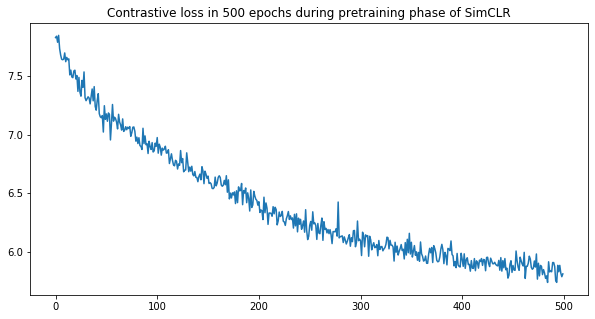

In [4]:
clf_pre['train_loss'].plot(figsize=(10,5),title='Contrastive loss in 500 epochs during pretraining phase of SimCLR')

In contrastive training, the distance (cosine distance/euclidean distance) between the two vectors from two labels are pulling away from each other, and essentially, the contrastive training is a cluster process. With different clusters, we need to build a classifier to perform the classification. In SimCLR, it does so by replacing the projection head with a classifier. Thus,  training a classifier is always necessary.   
The model, consisted of four layers encoder and linear projection head (128,) is trained with 500 epochs and SGD with learning rate of $10^{-5}$ for pretraining as previously suggested, the loss is with the decrease trend and fluctuated due to the stochastic nature of SGD

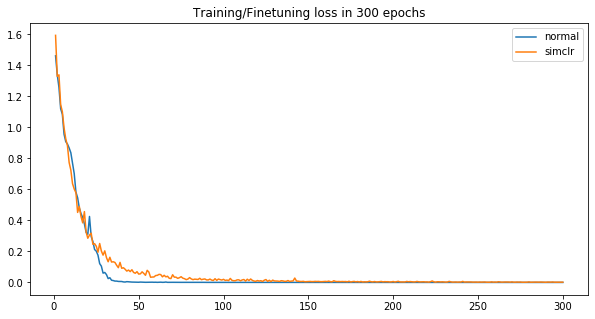

In [5]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,301),norm_val['train_loss'].values)
plt.plot(np.arange(1,301),clf_val['train_loss'].values)
plt.legend(['normal','simclr'])
plt.title('Training/Finetuning loss in 300 epochs')
plt.show()

After pretraining, we discard the projection head, freeze the encoder, and build a mlp (128--6) on top of it. And finetune with cross entropy, with 300 epochs and ADAM with learning rate of $10^{-5}$. To compare, we train a normal model for comparision with the same architecutre and setting (except freezing the encoder) 
Above shows the training loss in normal setting decrease much faster than in pretrained setting. 

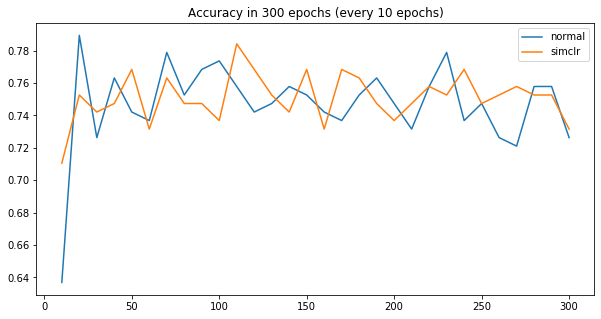

In [6]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(10,310,10),norm_acc['validation_accuracy'].values)
plt.plot(np.arange(10,310,10),clf_acc['validation_accuracy'].values)
plt.legend(['normal','simclr'])
plt.title('Accuracy in 300 epochs (every 10 epochs)')
plt.show()

For the actually accuracy. In general, they reach a similar level of 72-76%. With the pretraining, the model reach above 70% in first 10 epochs, significantly better than the normal. After that, they perform similarily. 

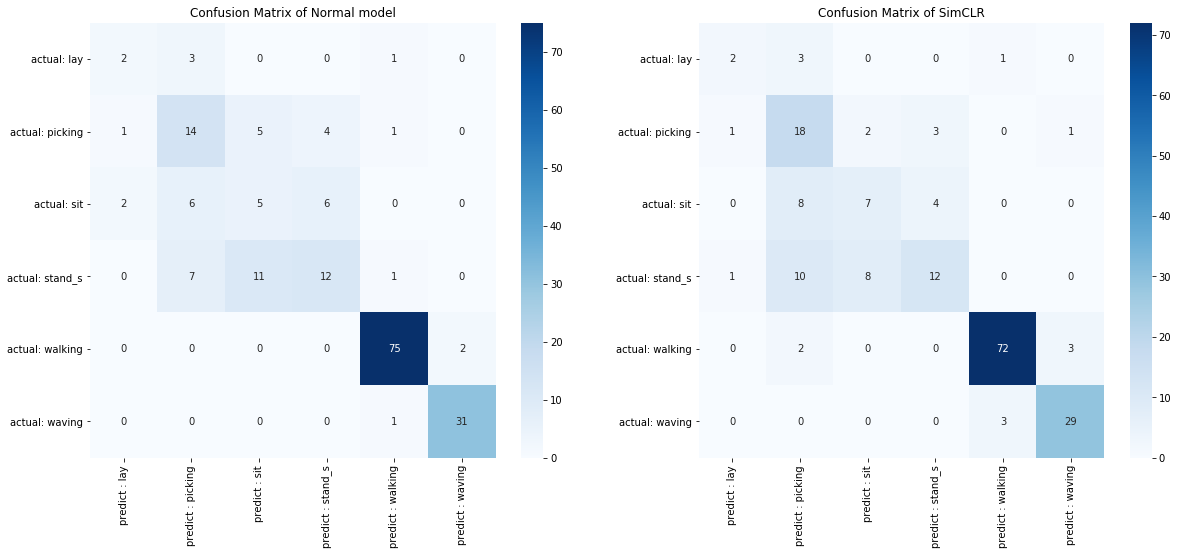

In [7]:
f,axs = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(norm_cmtx,ax=axs[0],cmap='Blues',annot=True)
axs[0].set_title('Confusion Matrix of Normal model')
sns.heatmap(clf_cmtx,ax=axs[1],cmap='Blues',annot=True)
axs[1].set_title('Confusion Matrix of SimCLR')
plt.show()

Here are the confusion matrix

### Updated: pretrained with 4000 epoch, classes applied by oversampled train set and undersampled test set

In [2]:
clf_pre = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_s_resampled_4000epochs_pretrain_checkpoint_4000__2021_02_08_22_43_loss.csv')
clf_loss  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_s_resampled_4000epochs_finetuning_checkpoint_200__2021_02_08_22_51_loss.csv')
clf_acc  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_s_resampled_4000epochs_finetuning_checkpoint_200__2021_02_08_22_51_accuracy.csv')
clf_cmtx  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_s_resampled_4000epochs_finetuning_checkpoint_200__2021_02_08_22_51_cmtx.csv',index_col=0)

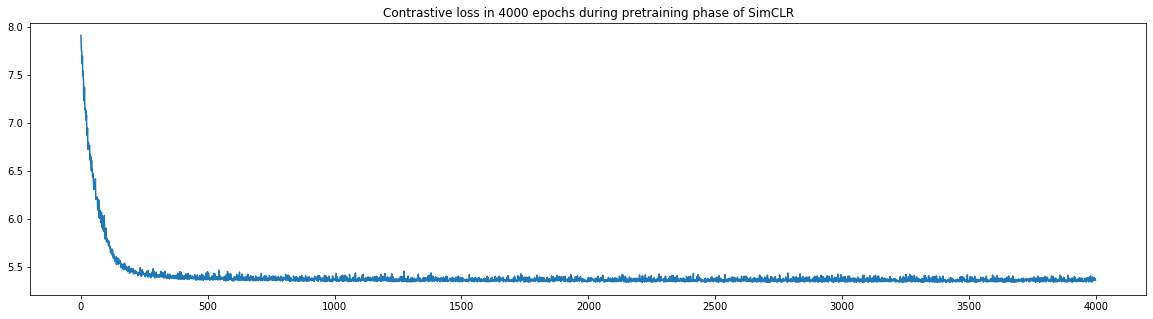

In [4]:
clf_pre['train_loss'].plot(figsize=(20,5),title='Contrastive loss in 4000 epochs during pretraining phase of SimCLR')

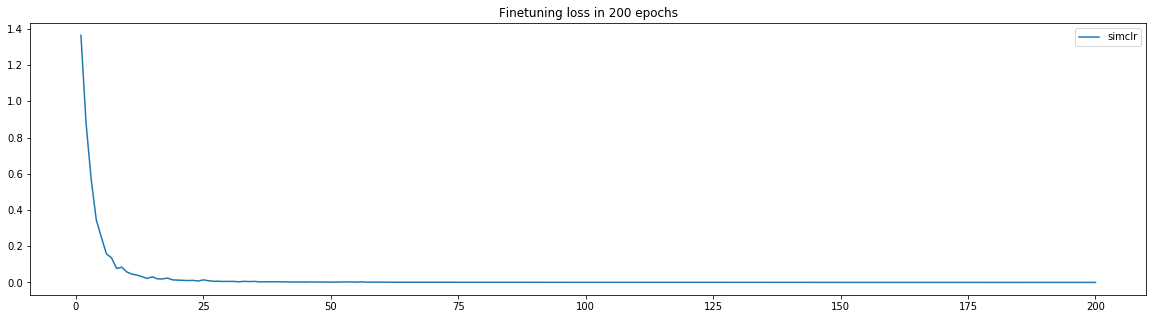

In [7]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(1,201),clf_loss['train_loss'].values)
plt.legend(['simclr'])
plt.title('Finetuning loss in 200 epochs')
plt.show()

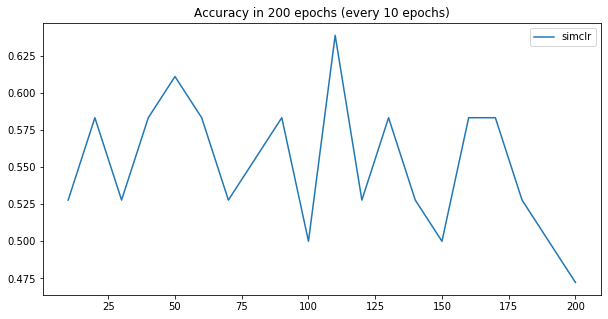

In [8]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(10,210,10),clf_acc['validation_accuracy'].values)
plt.legend(['simclr'])
plt.title('Accuracy in 200 epochs (every 10 epochs)')
plt.show()

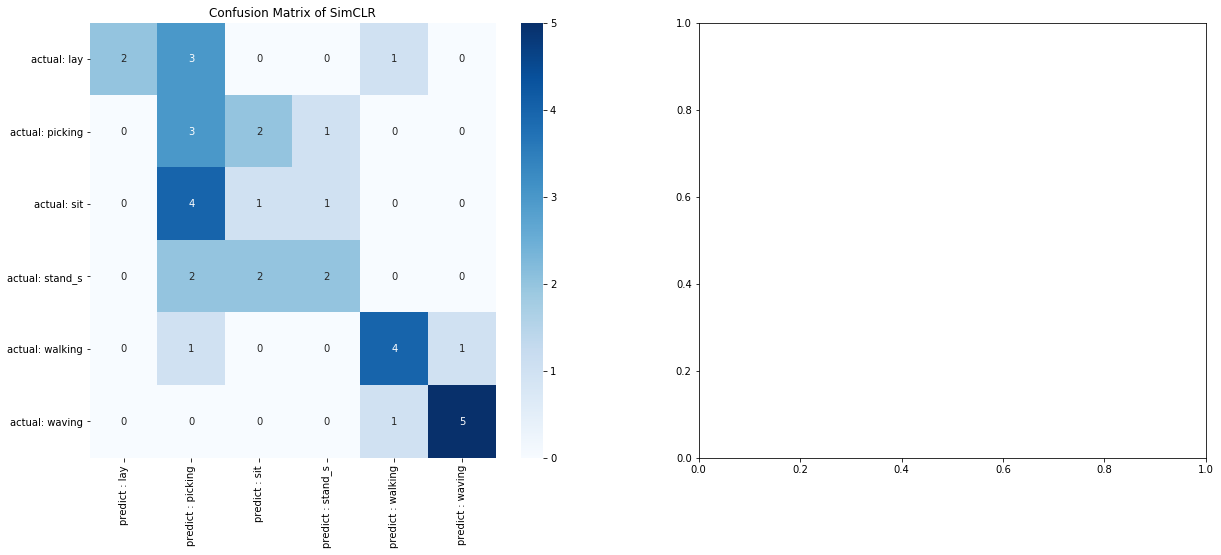

In [9]:
f,axs = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(clf_cmtx,ax=axs[0],cmap='Blues',annot=True)
axs[0].set_title('Confusion Matrix of SimCLR')
plt.show()